In [1]:
# Works best with jupyter-notebook

In [2]:
%matplotlib notebook 
#%matplotlib widget 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
import math
import numpy as np

import roboticstoolbox as rtb
from roboticstoolbox import ETS as ets

from spatialmath import *
from spatialmath.base import *
import spatialmath.base.symbolic as sym

import matplotlib.pyplot as plt
np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})

# Lecture 5.3

Let's now model a 3-joint planar robot, whose transforms are more complicated. We can still use ETS.

In [3]:
#import 3-joint planar robot model
robot = rtb.models.DH.Planar3()
print(robot)

┏━━━━┳━━━━━┳━━━━┳━━━━━━┓
┃θⱼ  ┃ dⱼ  ┃ aⱼ ┃  ⍺ⱼ  ┃
┣━━━━╋━━━━━╋━━━━╋━━━━━━┫
┃ q1 ┃ 0.0 ┃  1 ┃ 0.0° ┃
┃ q2 ┃ 0.0 ┃  1 ┃ 0.0° ┃
┃ q3 ┃ 0.0 ┃  1 ┃ 0.0° ┃
┗━━━━┻━━━━━┻━━━━┻━━━━━━┛

┌─────┬─────┬─────┬─────┐
│name │ q0  │ q1  │ q2  │
├─────┼─────┼─────┼─────┤
│  qz │  0° │  0° │  0° │
└─────┴─────┴─────┴─────┘



In [4]:
#To create a symbolic representation of the homogenous transformation matrix
a1 = sym.symbol('a1')
q1 = sym.symbol('q1')
a2 = sym.symbol('a2')
q2 = sym.symbol('q2')
a3 = sym.symbol('a3')
q3 = sym.symbol('q3')

e = ets.rz(q1)*ets.tx(a1)*ets.rz(q2)*ets.tx(a2)*ets.rz(q3)*ets.tx(a3)
print(e)


Rz(q1) * tx(a1) * Rz(q2) * tx(a2) * Rz(q3) * tx(a3)


<IPython.core.display.Javascript object>


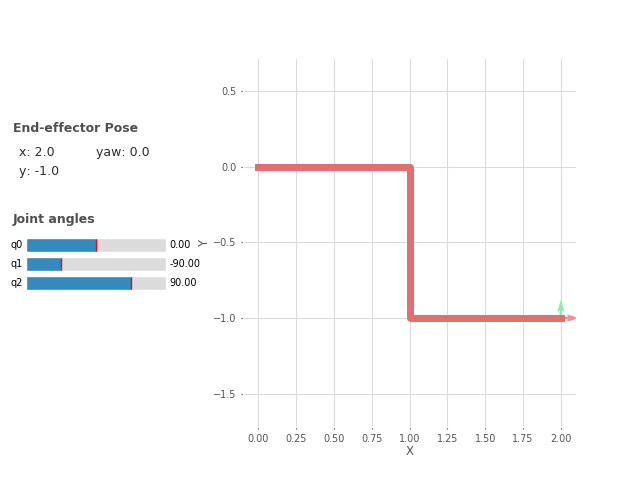

In [5]:
#A 3 joint planar model can be created using the planar3 toolbox model
import matplotlib; #matplotlib.use("nbAgg") 
from mpl_toolkits.mplot3d import Axes3D

robot.q=[0, -np.pi/2, np.pi/2]
e = robot.teach2()
# e = robot.teach() # works best outside the notebook.

<IPython.core.display.Javascript object>


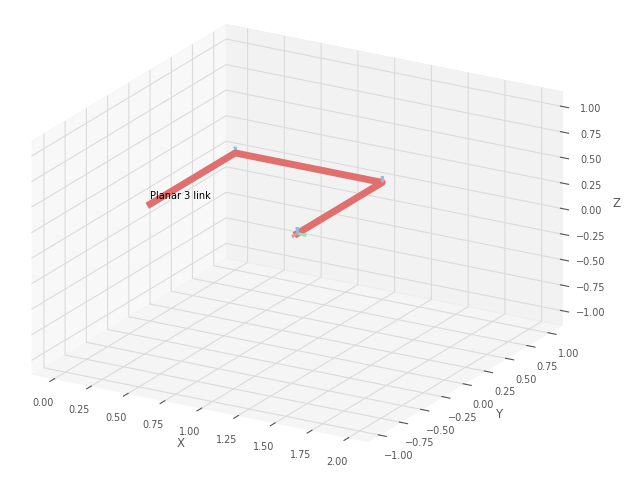

In [6]:
robot.q2=[np.pi/2, -np.pi/2, -np.pi/2]
#e = robot.teach()
robot.plot(robot.q2);